In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from sqlalchemy import create_engine
from sqlalchemy.sql import text

import baikalfunctions as bfunc
import scheme_mar2023 as scheme
import mytools
import mysecure

In [447]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [448]:
# pd.set_option('display.min_rows', 100)
%matplotlib inline
plt.style.use('dark_background')   # try another styles: 'classic'
plt.rcParams['figure.figsize'] = [15, 5]
#plt.subplots_adjust(top=1, left=0, right=1, bottom=0)

In [449]:
saveImgPath = 'G:\\1_Data1\\96_BaikalMar2024\\'
saveDataPath = 'G:\\1_Data1\\96_BaikalMar2024\\'
serverPath = 'C:\\xampp\\htdocs\\img\\'

In [450]:
host = "192.168.3.53"
# host = 'localhost'
tableName = "mar2024"

engine = create_engine(f"mysql+pymysql://{mysecure.user}:{mysecure.password}@{host}:3306/baikal")
# req = f"select * from {tableName} where DateTime > ADDDATE((SELECT DATETIME FROM {tableName} ORDER BY DATETIME DESC LIMIT 1), INTERVAL -24 hour);"
req = f"select * from {tableName}"

In [451]:
with engine.connect().execution_options(autocommit=True) as conn:
    query = conn.execute(text(req))

df = pd.DataFrame(query.fetchall())

In [452]:
df.tail(5)

,DateTime,Comments,AIR_TEMPERATURE,AIR_TEMPERATURE_err,AIR_PRESSURE,AIR_PRESSURE_err,RAIN,RAIN_err,LIGHT_LX,LIGHT_LX_err,UV,UV_err,V1_state,V1_state_err,V2_state,V2_state_err,V3_state,V3_state_err,V4_state,V4_state_err,V5_state,V5_state_err,V6_state,V6_state_err,V7_state,V7_state_err,V8_state,V8_state_err,PUMP_PROBE_state,PUMP_PROBE_state_err,PUMP_VENTILATION_state,PUMP_VENTILATION_state_err,AIR_FLOW,AIR_FLOW_err,LATITUDE,LATITUDE_err,LONGITUDE,LONGITUDE_err,SPEED,SPEED_err,COURSE,COURSE_err,RELEY_1,RELEY_1_err,RELEY_2,RELEY_2_err,RELEY_3,RELEY_3_err,RELEY_4,RELEY_4_err,...,WATER_FLOW_2,WATER_FLOW_2_err,WATER_FLOW_3,WATER_FLOW_3_err,WATER_FLOW_4,WATER_FLOW_4_err,TEMP_DS1,TEMP_DS1_err,TEMP_DS2,TEMP_DS2_err,TEMP_DS3,TEMP_DS3_err,METEO_LEVEL,METEO_LEVEL_err,METEO_PRESS,METEO_PRESS_err,METEO_TIME,METEO_TIME_err,METEO_TEMP,METEO_TEMP_err,METEO_HUM,METEO_HUM_err,METEO_SOLAR,METEO_SOLAR_err,METEO_WIND_DIR,METEO_WIND_DIR_err,METEO_WIND_SPEED,METEO_WIND_SPEED_err,METEO_WIND_SPEED_MAX,METEO_WIND_SPEED_MAX_err,METEO_RAIN,METEO_RAIN_err,PICARRO_CO2,PICARRO_CO2_err,PICARRO_CH4,PICARRO_CH4_err,PICARRO_H2O,PICARRO_H2O_err,NX_B,NX_B_err,KFA_B,KFA_B_err,NX_G,NX_G_err,KFA_G,KFA_G_err,NX_R,NX_R_err,KFA_R,KFA_R_err
14855,2024-03-22 09:14:40,None,-0.928636,0.039918,96030.2,7.36103,0.0,0.0,9400.0,0.0,28.0667,0.252263,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.53,1.123060e-16,51.8997,0.000002,105.064,0.000004,0.161313,0.088095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.052,0.067132,0.0,0.0,0.0,0.0,1.366,0.047656,0.358,0.025298,12.434,0.018974,2908.20,0.327026,718.348,0.008922,1.711070e+09,5.91608,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,412.406,NaN,8.56120,NaN,0.5789,NaN,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
14856,2024-03-22 09:15:00,None,-1.136670,0.081492,96027.9,4.64529,0.0,0.0,9400.0,0.0,28.7045,0.461522,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.53,1.122770e-16,51.8997,0.000003,105.064,0.000005,0.124000,0.105248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.052,0.067132,0.0,0.0,0.0,0.0,1.353,0.042701,0.391,0.033813,12.422,0.028983,2907.44,0.908293,718.363,0.011626,1.711070e+09,6.20484,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,413.055,0.45375,8.53595,0.012799,0.5789,0.0,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
14857,2024-03-22 09:15:20,None,-0.963864,0.168733,96029.2,2.51866,0.0,0.0,9400.0,0.0,29.0000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.53,1.123060e-16,51.8997,0.000003,105.064,0.000007,0.148067,0.101651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.922,0.067132,0.0,0.0,0.0,0.0,1.372,0.043410,0.371,0.030714,12.392,0.025298,2907.99,1.421820,718.312,0.012435,1.711070e+09,5.62731,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,415.037,NaN,8.52690,NaN,0.5789,NaN,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
14858,2024-03-22 09:15:40,None,-0.677500,0.032787,96027.0,9.26803,0.0,0.0,9400.0,0.0,29.0000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.53,1.123060e-16,51.8997,0.000017,105.064,0.000014,0.184933,0.116581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.896,0.054813,0.0,0.0,0.0,0.0,1.364,0.018974,0.371,0.030714,12.366,0.029515,2908.66,1.061670,718.341,0.019403,1.711070e+09,5.91608,NaN,None,77.0,None,87.9,None,246.0,None,4.3,None,7.2,None,0.0,None,417.793,NaN,8.54720,NaN,0.5789,NaN,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
14859,2024-03-22 09:16:00,None,-0.889111,0.163524,96027.1,6.76673,0.0,0.0,9400.0,0.0,29.0000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.53,1.122770e-16,51.8997,0.000004,105.064,0.000002,0.253294,0.195929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.974,0.054813,0.0,0.0,0.0,0.0,1.346,0.030984,0.365,0.036286,12.324,0.029515,2908.89,1.112490,718.339,0.023198,1.711070e+09,6.20484,NaN,None,NaN,None,NaN,No

In [453]:
df.columns

Index(['DateTime', 'Comments', 'AIR_TEMPERATURE', 'AIR_TEMPERATURE_err',
       'AIR_PRESSURE', 'AIR_PRESSURE_err', 'RAIN', 'RAIN_err', 'LIGHT_LX',
       'LIGHT_LX_err',
       ...
       'KFA_B', 'KFA_B_err', 'NX_G', 'NX_G_err', 'KFA_G', 'KFA_G_err', 'NX_R',
       'NX_R_err', 'KFA_R', 'KFA_R_err'],
      dtype='object', length=102)

In [454]:
df.rename(columns=scheme.NAME_CONV_BAS, inplace=True)
df.sort_values(by='DateTime', inplace=True)
df.reset_index(inplace=True, drop=True)
df.head(2)

,DateTime,Comments,TempAir,AIR_TEMPERATURE_err,PressAir,AIR_PRESSURE_err,Precipitation,RAIN_err,LightLX,LIGHT_LX_err,LightUV,UV_err,V1_state,V1_state_err,V2_state,V2_state_err,V3_state,V3_state_err,V4_state,V4_state_err,V5_state,V5_state_err,V6_state,V6_state_err,V7_state,V7_state_err,V8_state,V8_state_err,PUMP_PROBE_state,PUMP_PROBE_state_err,PUMP_VENTILATION_state,PUMP_VENTILATION_state_err,AirFlow,AIR_FLOW_err,Latitude,LATITUDE_err,Longitude,LONGITUDE_err,Speed,SPEED_err,Course,COURSE_err,RELEY_1,RELEY_1_err,RELEY_2,RELEY_2_err,RELEY_3,RELEY_3_err,RELEY_4,RELEY_4_err,...,WaterFlowEqu2,WATER_FLOW_2_err,WaterFlowEqu3,WATER_FLOW_3_err,WaterFlowEqu4,WATER_FLOW_4_err,TempEqu1,TEMP_DS1_err,TempEqu2,TEMP_DS2_err,TempEqu3,TEMP_DS3_err,METEO_LEVEL,METEO_LEVEL_err,METEO_PRESS,METEO_PRESS_err,METEO_TIME,METEO_TIME_err,METEO_TEMP,METEO_TEMP_err,METEO_HUM,METEO_HUM_err,METEO_SOLAR,METEO_SOLAR_err,METEO_WIND_DIR,METEO_WIND_DIR_err,METEO_WIND_SPEED,METEO_WIND_SPEED_err,METEO_WIND_SPEED_MAX,METEO_WIND_SPEED_MAX_err,METEO_RAIN,METEO_RAIN_err,vCO2,vCO2Err,vCH4,vCH4Err,vH2O,vH2OErr,FluoNxBlu,NX_B_err,FluoKfaBlu,KFA_B_err,FluoNxGrn,NX_G_err,FluoKfaGrn,KFA_G_err,FluoNxRed,NX_R_err,FluoKfaRed,KFA_R_err
0,2024-03-18 22:24:00,None,4.61182,0.008739,96980.0,1.79789,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.476000,0.005164,51.8997,0.000000,105.064,0.000000,0.110,0.075941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,25.940,0.000000,25.120,0.000000,26.590,0.042426,2959.67,0.049497,725.786,0.000707,1.710770e+09,0.707107,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
1,2024-03-18 22:24:20,None,4.68886,0.054824,96980.3,1.54039,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.470227,0.003402,51.8997,0.000005,105.064,0.000004,0.164,0.153219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,25.898,0.036148,25.127,0.022136,26.524,0.030984,2959.76,0.062648,725.782,0.001327,1.710770e+09,6.204840,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None


In [455]:
df.sort_values(by='DateTime', inplace=True)

In [456]:
### remove service variables
df.drop([x for x in df.columns if x.lower().endswith('err')], axis='columns', inplace=True, errors='ignore')
df.drop([x for x in df.columns if x.lower().endswith('max')], axis='columns', inplace=True, errors='ignore')
df.drop([x for x in df.columns if x.lower().endswith('min')], axis='columns', inplace=True, errors='ignore')
df.drop([x for x in df.columns if x.lower().startswith('pump')], axis='columns', inplace=True, errors='ignore')
df.drop(['HumidityAir', ], axis='columns', inplace=True, errors='ignore')


In [457]:
df.shape, df.columns

((14860, 49),
 Index(['DateTime', 'Comments', 'TempAir', 'PressAir', 'Precipitation',
        'LightLX', 'LightUV', 'V1_state', 'V2_state', 'V3_state', 'V4_state',
        'V5_state', 'V6_state', 'V7_state', 'V8_state', 'AirFlow', 'Latitude',
        'Longitude', 'Speed', 'Course', 'RELEY_1', 'RELEY_2', 'RELEY_3',
        'RELEY_4', 'WaterFlowEqu1', 'WaterFlowEqu2', 'WaterFlowEqu3',
        'WaterFlowEqu4', 'TempEqu1', 'TempEqu2', 'TempEqu3', 'METEO_LEVEL',
        'METEO_PRESS', 'METEO_TIME', 'METEO_TEMP', 'METEO_HUM', 'METEO_SOLAR',
        'METEO_WIND_DIR', 'METEO_WIND_SPEED', 'METEO_RAIN', 'vCO2', 'vCH4',
        'vH2O', 'FluoNxBlu', 'FluoKfaBlu', 'FluoNxGrn', 'FluoKfaGrn',
        'FluoNxRed', 'FluoKfaRed'],
       dtype='object'))

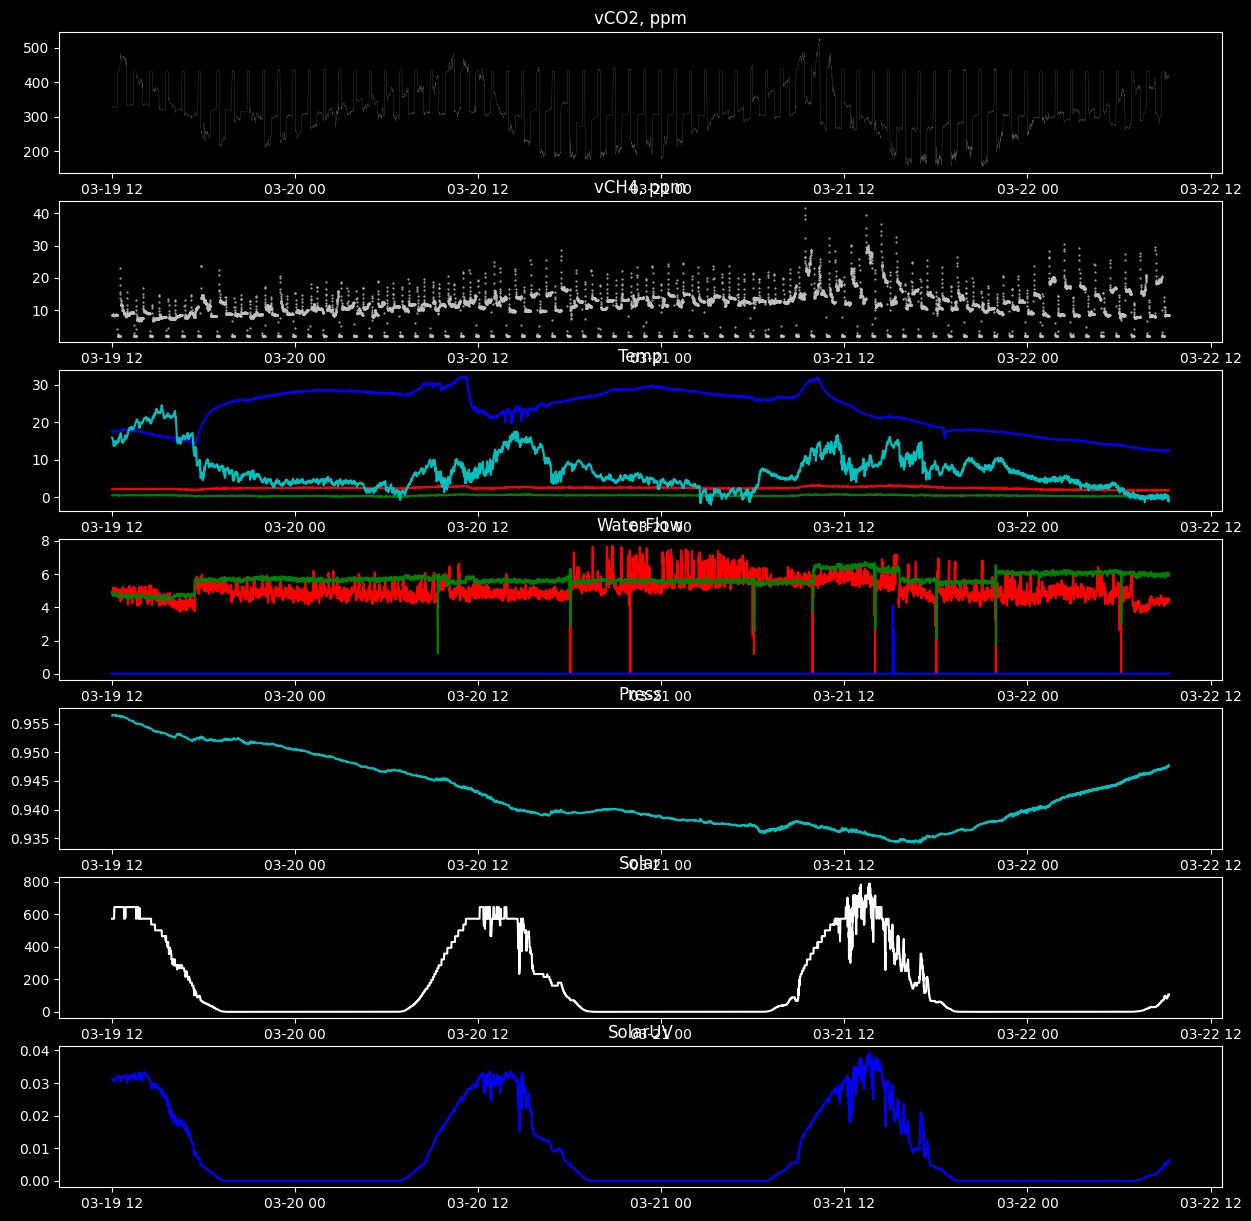

In [ ]:
plt.rcParams['figure.figsize'] = [15, 15]
fig, axs = plt.subplots(7, 1)

axs[0].set_title('vCO2, ppm')
axs[0].plot(df.DateTime, df['vCO2'], '-', c='silver', linewidth=0.1)

axs[1].set_title('vCH4, ppm')
axs[1].plot(df.DateTime, df['vCH4'], '.', c='silver', markersize=1)

axs[2].set_title('Temp')
axs[2].plot(df.DateTime, df['TempEqu1'], 'r-')
axs[2].plot(df.DateTime, df['TempEqu2'], 'g-')
axs[2].plot(df.DateTime, df['TempEqu3'], 'b-')
axs[2].plot(df.DateTime, df['TempAir'], 'c-')

axs[3].set_title('WaterFlow')
axs[3].plot(df.DateTime, df['WaterFlowEqu1'], 'r-')
axs[3].plot(df.DateTime, df['WaterFlowEqu2'], 'g-')
axs[3].plot(df.DateTime, df['WaterFlowEqu3'], 'b-')

axs[4].set_title('Press')
axs[4].plot(df.DateTime, df['PressAir'], 'c-')
axs[5].set_title('Solar')
axs[5].plot(df.DateTime, df['LightLX'], 'w-')
axs[6].set_title('SolarUV')
axs[6].plot(df.DateTime, df['LightUV'], 'b-')



### Correction data

In [459]:
## gether/apply specific variables
### data corrections
# df['vCO2'] = df['vCO2'] * scheme.CO2PicarroScaut_cor[0] + scheme.CO2PicarroScaut_cor[1]
# df['vCH4'] = df['vCH4'] * scheme.CH4PicarroScaut_cor[0] + scheme.CH4PicarroScaut_cor[1]
# df['vCO2'] = df['CO2_dry']
# df['vCH4'] = df['CH4_dry']
df['LightLX'] = df['LightLX'] * scheme.solar_cor[0] + scheme.solar_cor[1]
df['LightUV'] = df['LightUV'] * scheme.solar_uv_cor[0] + scheme.solar_uv_cor[1]
df['PressAir'] = bfunc.pressConvert(df['PressAir'])
df['PressAir'] = df['PressAir'] * scheme.press_cor[0] + scheme.press_cor[1]

### servise data corrections
df['TempEqu1'] = df['TempEqu1'] * scheme.tempEqu1_cor[0] + scheme.tempEqu1_cor[1]
df['TempEqu2'] = df['TempEqu2'] * scheme.tempEqu2_cor[0] + scheme.tempEqu2_cor[1]
df['TempEqu3'] = df['TempEqu3'] * scheme.tempEqu3_cor[0] + scheme.tempEqu3_cor[1]

df['AirFlow'] = df['AirFlow'] * scheme.airflow_cor[0] + scheme.airflow_cor[1]
df['WaterFlowEqu1'] = df['WaterFlowEqu1'] * scheme.waterflowEqu1_cor[0] + scheme.waterflowEqu1_cor[1]
df['WaterFlowEqu2'] = df['WaterFlowEqu2'] * scheme.waterflowEqu2_cor[0] + scheme.waterflowEqu2_cor[1]
df['WaterFlowEqu3'] = df['WaterFlowEqu3'] * scheme.waterflowEqu3_cor[0] + scheme.waterflowEqu3_cor[1]

In [460]:
v_state_list = list(scheme.CHANNEL_COLS.values())

chnl = 'Channel'
if not chnl in df.columns:
    df[chnl] = 0
if 'V1_state' in df.columns:
    df.loc[df.V1_state == 1, chnl] = 1
    df.loc[df.V2_state == 1, chnl] = 2
    df.loc[df.V3_state == 1, chnl] = 3
    df.loc[df.V4_state == 1, chnl] = 4
    df.loc[df.V5_state == 1, chnl] = 5
    df.loc[df.V6_state == 1, chnl] = 6
df.drop(v_state_list, inplace=True, errors='ignore')

###  Remove bad data   
List of accidental cases to filter data (see notes)

In [461]:
filter_list = [{'date_start': '01.08.2023 00:00', 'date_stop': '19.03.2024 12:00', 'cols': [x for x in df.columns], 'fill_with': np.NaN},   # Picarro is not ready
               {'date_start': '21.03.2024 15:26', 'date_stop': '21.03.2024 15:32', 'cols': ['TempEqu1', 'WaterFlowEqu1'], 'fill_with': np.NaN},   # Water flow meter replaced
               {'date_start': '04.08.2023 12:26', 'date_stop': '04.08.2023 14:39', 'cols': ['WaterFlowEqu1'], 'fill_with': 0},       # water flow unstable
               {'date_start': '04.08.2023 14:30', 'date_stop': '04.08.2023 14:37', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # pump 'surface' disconnected
               {'date_start': '05.08.2023 02:30', 'date_stop': '05.08.2023 08:06', 'cols': ['TempEqu2'], 'fill_with': np.NaN},       # temperature sensor pulled out
               {'date_start': '06.08.2023 16:55', 'date_stop': '06.08.2023 16:59', 'cols': ['TempEqu2'], 'fill_with': np.NaN},       # temperature sensor pulled out
               {'date_start': '07.08.2023 13:23', 'date_stop': '07.08.2023 16:06', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # channel selector unit disfunction
               {'date_start': '07.08.2023 13:42', 'date_stop': '07.08.2023 16:56', 'cols': ['WaterFlowEqu1', 'WaterFlowEqu2'], 'fill_with': 0},  # water flow unstable
               {'date_start': '07.08.2023 16:19', 'date_stop': '07.08.2023 16:44', 'cols': ['TempEqu2'], 'fill_with': np.NaN},       # temperature sensor pulled out
               {'date_start': '08.08.2023 06:56', 'date_stop': '08.08.2023 10:56', 'cols': ['WaterFlowEqu1'], 'fill_with': 0},       # water flow unstable
               {'date_start': '08.08.2023 02:30', 'date_stop': '08.08.2023 10:00', 'cols': ['TempEqu2'], 'fill_with': np.NaN},
               {'date_start': '08.08.2023 10:43', 'date_stop': '08.08.2023 10:51', 'cols': ['TempEqu1'], 'fill_with': np.NaN},       # water flow unstable
               {'date_start': '08.08.2023 11:22', 'date_stop': '08.08.2023 11:30', 'cols': ['WaterFlowEqu2'], 'fill_with': 0},       # water flow unstable
               {'date_start': '08.08.2023 11:22', 'date_stop': '08.08.2023 11:30', 'cols': ['TempEqu2'], 'fill_with': np.NaN},
               {'date_start': '08.08.2023 14:51', 'date_stop': '08.08.2023 14:59', 'cols': ['TempEqu1'], 'fill_with': np.NaN},
              ]

for cycle in filter_list:
    for col in cycle['cols']:
        date_start = pd.to_datetime(cycle['date_start'], dayfirst=True)
        date_stop = pd.to_datetime(cycle['date_stop'], dayfirst=True)
        df.loc[(df['DateTime'] > date_start) & (df['DateTime'] < date_stop), col] = cycle['fill_with']

In [462]:
cols = ['FluoNxRed', 'FluoNxGrn', 'FluoNxBlu', 'FluoKfaRed', 'FluoKfaGrn', 'FluoKfaBlu']
for col in cols:
    df.loc[df[col] == 0, col] = np.NaN

In [463]:
cols = ['WaterFlowEqu1', 'WaterFlowEqu2', 'WaterFlowEqu3', 'WaterFlowEqu4', 'AirFlow']
for col in cols:
    df.loc[df[col] < 0, col] = np.NaN

In [464]:
df['reff'] = 1
df = df.resample('20S', on='DateTime').mean()
df[chnl].fillna(method='ffill', inplace=True)
ch_v = 'Chn_valid'
df[ch_v] = 1
for deep in range(1, 7):
    df.loc[df[chnl] != df[chnl].shift(deep), ch_v] = 0
df.dropna(axis='index', subset=['reff'], inplace=True)

C:\Users\pestu\AppData\Local\Temp\ipykernel_9228\3351807005.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('20S', on='DateTime').mean()


In [465]:
df['DateTime'] = df.index
df

,TempAir,PressAir,Precipitation,LightLX,LightUV,V1_state,V2_state,V3_state,V4_state,V5_state,V6_state,V7_state,V8_state,AirFlow,Latitude,Longitude,Speed,Course,RELEY_1,RELEY_2,RELEY_3,RELEY_4,WaterFlowEqu1,WaterFlowEqu2,WaterFlowEqu3,WaterFlowEqu4,TempEqu1,TempEqu2,TempEqu3,METEO_LEVEL,METEO_PRESS,METEO_TIME,METEO_TEMP,METEO_HUM,METEO_SOLAR,METEO_WIND_DIR,METEO_WIND_SPEED,METEO_RAIN,vCO2,vCH4,vH2O,FluoNxBlu,FluoKfaBlu,FluoNxGrn,FluoKfaGrn,FluoNxRed,FluoKfaRed,Channel,reff,Chn_valid,DateTime
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-03-19 12:00:00,15.972500,0.956437,0.0,573.14332,0.031186,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.44717,51.8996,105.064,0.176294,0.0,0.0,0.0,0.0,0.0,4.945,4.813,0.0,0.0,2.110,0.460,17.621,2927.77,725.828,1.710820e+09,NaN,NaN,NaN,NaN,NaN,NaN,328.846,8.36070,0.5219,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0,2024-03-19 12:00:00
2024-03-19 12:00:20,15.947100,0.956443,0.0,573.14332,0.031325,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.44717,51.8996,105.064,0.145467,0.0,0.0,0.0,0.0,0.0,4.813,4.865,0.0,0.0,2.122,0.490,17.627,2927.83,725.827,1.710820e+09,NaN,NaN,NaN,NaN,NaN,NaN,328.508,8.36895,0.5219,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0,2024-03-19 12:00:20
2024-03-19 12:00:40,15.918400,0.956445,0.0,573.14332,0.031205,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.44717,51.8996,105.064,0.070286,0.0,0.0,0.0,0.0,0.0,4.839,4.904,0.0,0.0,2.110,0.484,17.597,2928.02,725.817,1.710820e+09,NaN,NaN,NaN,NaN,NaN,NaN,327.993,8.40070,0.5219,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0,2024-03-19 12:00:40
2024-03-19 12:01:00,15.922500,0.956427,0.0,573.14332,0.031214,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.44717,51.8997,105.064,0.084312,0.0,0.0,0.0,0.0,0.0,4.774,4.865,0.0,0.0,2.092,0.490,17.572,2927.79,725.845,1.710820e+09,NaN,NaN,NaN,NaN,NaN,NaN,327.810,8.43550,0.5219,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0,2024-03-19 12:01:00
2024-03-19 12:01:20,15.921100,0.956426,0.0,573.14332,0.031220,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.44717,51.8997,105.064,0.097625,0.0,0.0,0.0,0.0,0.0,4.774,4.917,0.0,0.0,2.103,0.502,17.560,2928.05,725.842,1.710820e+09,NaN,NaN,NaN,NaN,NaN,NaN,327.930,8.45720,0.5219,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0,2024-03-19 12:01:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22 09:14:40,-0.928636,0.947744,0.0,107.46080,0.006155,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.38939,51.8997,105.064,0.161313,0.0,0.0,0.0,0.0,0.0,4.517,6.052,0.0,0.0,1.816,0.158,12.434,2908.20,718.348,1.711070e+09,NaN,NaN,NaN,NaN,NaN,NaN,412.406,8.56120,0.5789,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0,2024-03-22 09:14:40
2024-03-22 09:15:00,-1.136670,0.947722,0.0,107.46080,0.006295,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.38939,51.8997,105.064,0.124000,0.0,0.0,0.0,0.0,0.0,4.531,6.052,0.0,0.0,1.803,0.191,12.422,2907.44,718.363,1.711070e+09,NaN,NaN,NaN,NaN,NaN,NaN,413.055,8.53595,0.5789,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0,2024-03-22 09:15:00
2024-03-22 09:15:20,-0.963864,0.947735,0.0,107.46080,0.006360,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.38939,51.8997,105.064,0.148067,0.0,0.0,0.0,0.0,0.0,4.322,5.922,0.0,0.0,1.822,0.171,12.392,2907.99,718.312,1.711070e+09,NaN,NaN,NaN,NaN,NaN,NaN,415.037,8.52690,0.5789,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,2024-03-22 09:15:20


In [466]:
df['vCO2air'] = df['vCO2'][(df[chnl] == 6) & (df[ch_v] == 1)]
df['vCH4air'] = df['vCH4'][(df[chnl] == 6) & (df[ch_v] == 1)]
for col in ['vCO2air', 'vCH4air',]:
    df[col] = df[col].rolling(3).mean()

df['vCO2air'].interpolate(method='values', inplace=True)
df['vCH4air'].interpolate(method='values', inplace=True)  ## `time` method mb better
df['pCO2air'] = df['vCO2air'] * df['PressAir']  # mkatm
df['pCH4air'] = df['vCH4air'] * df['PressAir']  # mkatm

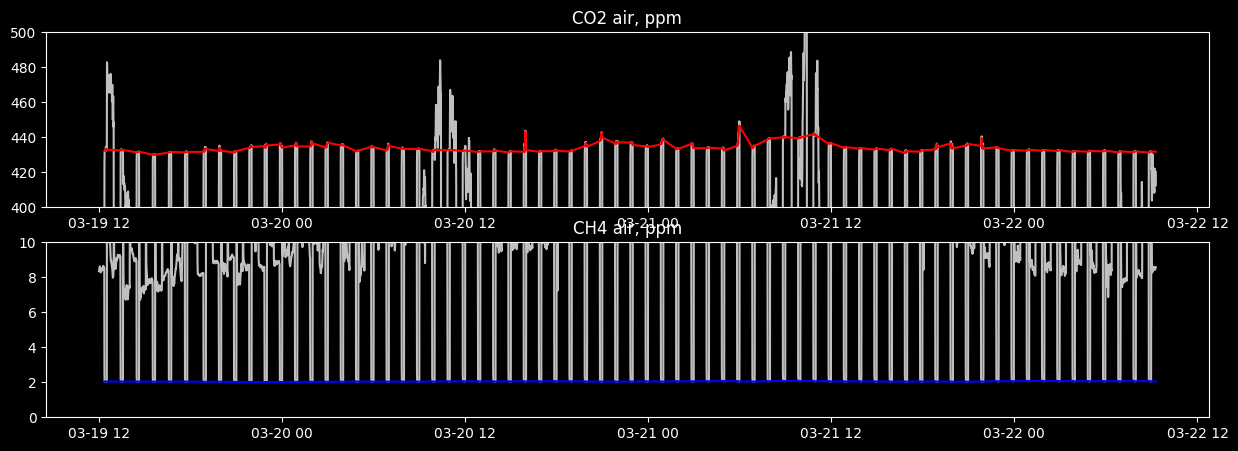

In [467]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, axs = plt.subplots(2, 1)

axs[0].set_title('CO2 air, ppm')
axs[0].set_ylim(400, 500)
axs[0].plot(df.DateTime, df['vCO2'], '-', c='silver')
axs[0].plot(df.DateTime, df['vCO2air'], 'r-')

axs[1].set_title('CH4 air, ppm')
axs[1].set_ylim(0, 10)
axs[1].plot(df.DateTime, df['vCH4'], '-', c='silver')
axs[1].plot(df.DateTime, df['vCH4air'], 'b-')
fig.savefig(saveImgPath+'cAir_vs_time.png', transparent=False)

In [468]:
df['pCO2'] = df['vCO2'] * df['PressAir']
df['pCH4'] = df['vCH4'] * df['PressAir']

In [469]:
df.columns

Index(['TempAir', 'PressAir', 'Precipitation', 'LightLX', 'LightUV',
       'V1_state', 'V2_state', 'V3_state', 'V4_state', 'V5_state', 'V6_state',
       'V7_state', 'V8_state', 'AirFlow', 'Latitude', 'Longitude', 'Speed',
       'Course', 'RELEY_1', 'RELEY_2', 'RELEY_3', 'RELEY_4', 'WaterFlowEqu1',
       'WaterFlowEqu2', 'WaterFlowEqu3', 'WaterFlowEqu4', 'TempEqu1',
       'TempEqu2', 'TempEqu3', 'METEO_LEVEL', 'METEO_PRESS', 'METEO_TIME',
       'METEO_TEMP', 'METEO_HUM', 'METEO_SOLAR', 'METEO_WIND_DIR',
       'METEO_WIND_SPEED', 'METEO_RAIN', 'vCO2', 'vCH4', 'vH2O', 'FluoNxBlu',
       'FluoKfaBlu', 'FluoNxGrn', 'FluoKfaGrn', 'FluoNxRed', 'FluoKfaRed',
       'Channel', 'reff', 'Chn_valid', 'DateTime', 'vCO2air', 'vCH4air',
       'pCO2air', 'pCH4air', 'pCO2', 'pCH4'],
      dtype='object')

## RECOVERY !!!

In [470]:
df['DateSec'] = df['DateTime'].astype('int64') //10**9
df['dTSec'] = df['DateSec'] - df['DateSec'].shift(1)
dt = df['dTSec'] / 60   ## delta time, min
ch_v = 'Chn_valid'

#### recovery `CO2/CH4`, channel `1` (bottom in mar 2024)

In [471]:
equ_vol = scheme.equ_walltube_param['equ_vol']  # equivalent equ volume, l
equ_cap = scheme.equ_walltube_param['equ_cap']  # equilibrator capacity
wtr_flow_min = scheme.equ_walltube_param['water_flow_min'] 

In [472]:
t_wtr = df['TempEqu1']
t_air = t_wtr
wtr_flow = df['WaterFlowEqu1']
air_flow = df['AirFlow']

In [473]:
### CO2 water
vGasEqu = df['vCO2'][(df[chnl] == 1) & (df[ch_v] == 1) & (wtr_flow > wtr_flow_min)]
solubility = bfunc.getSolubility(t_wtr, 'CO2')

density = bfunc.getDensity(t_air, df['PressAir'], 'CO2')
cGasAir = df['pCO2air'] / 1000000 * density
pGasEquAir = vGasEqu * df['PressAir']  # uatm
cGasEquAir = pGasEquAir * density / 1000000  # g/l

tau = equ_vol/(air_flow+wtr_flow*equ_cap*solubility/density)
eternal = (cGasEquAir-cGasEquAir.shift(1)*np.exp(-1*dt/tau))/(1-np.exp(-1*dt/tau))
cGasWtr = (eternal*(wtr_flow*equ_cap*solubility/density+air_flow)-air_flow*cGasAir)/(wtr_flow*equ_cap)

df['cCO2bot'] = cGasWtr * 1000     # mg/l
df['pCO2bot'] = cGasWtr * 1000000 / solubility  # mkatm

In [474]:
### CH4 water
vGasEqu = df['vCH4'][(df[chnl] == 1) & (df[ch_v] == 1) & (wtr_flow > wtr_flow_min)]
solubility = bfunc.getSolubility(t_wtr, 'CH4')

density = bfunc.getDensity(t_air, df['PressAir'], 'CH4')
cGasAir = df['pCH4air'] / 1000000 * density
pGasEquAir = vGasEqu * df['PressAir']
cGasEquAir = pGasEquAir * density / 1000000  # g/l

tau = equ_vol/(air_flow+wtr_flow*equ_cap*solubility/density)
eternal = (cGasEquAir-cGasEquAir.shift(1)*np.exp(-1*dt/tau))/(1-np.exp(-1*dt/tau))
cGasWtr = (eternal*(wtr_flow*equ_cap*solubility/density+air_flow)-air_flow*cGasAir)/(wtr_flow*equ_cap)
df['cCH4bot'] = cGasWtr * 1000000000    # ng/l
df['pCH4bot'] = cGasWtr * 1000000 / solubility  # mkatm

#### recovery `CO2/CH4`, channel `2` (surface in mar 2024)

In [475]:
t_wtr = df['TempEqu2']
t_air = t_wtr
wtr_flow = df['WaterFlowEqu2']

In [476]:
### CO2 water
vGasEqu = df['vCO2'][(df[chnl] == 2) & (df[ch_v] == 1) & (wtr_flow > wtr_flow_min)]
solubility = bfunc.getSolubility(t_wtr, 'CO2')

density = bfunc.getDensity(t_air, df['PressAir'], 'CO2')
cGasAir = df['pCO2air'] / 1000000 * density
pGasEquAir = vGasEqu * df['PressAir']
cGasEquAir = pGasEquAir * density / 1000000  # g/l

tau = equ_vol/(air_flow+wtr_flow*equ_cap*solubility/density)
eternal = (cGasEquAir-cGasEquAir.shift(1)*np.exp(-1*dt/tau))/(1-np.exp(-1*dt/tau))
cGasWtr = (eternal*(wtr_flow*equ_cap*solubility/density+air_flow)-air_flow*cGasAir)/(wtr_flow*equ_cap)

df['cCO2sur'] = cGasWtr * 1000     # mg/l
df['pCO2sur'] = cGasWtr * 1000000 / solubility  # mkatm

In [477]:
### CH4 water
vGasEqu = df['vCH4'][(df[chnl] == 2) & (df[ch_v] == 1) & (wtr_flow > wtr_flow_min)]
solubility = bfunc.getSolubility(t_wtr, 'CH4')

density = bfunc.getDensity(t_air, df['PressAir'], 'CH4')
cGasAir = df['pCH4air'] / 1000000 * density
pGasEquAir = vGasEqu * df['PressAir']
cGasEquAir = pGasEquAir * density / 1000000  # g/l

tau = equ_vol/(air_flow+wtr_flow*equ_cap*solubility/density)
eternal = (cGasEquAir-cGasEquAir.shift(1)*np.exp(-1*dt/tau))/(1-np.exp(-1*dt/tau))
cGasWtr = (eternal*(wtr_flow*equ_cap*solubility/density+air_flow)-air_flow*cGasAir)/(wtr_flow*equ_cap)
df['cCH4sur'] = cGasWtr * 1000000000    # ng/l
df['pCH4sur'] = cGasWtr * 1000000 / solubility  # mkatm

In [478]:
## rolling average is applied inplace. Be cafelly, run this cell **ONCE**

for col in ['cCO2sur', 'cCO2bot', 'pCO2sur', 'pCO2bot', 'cCH4sur', 'pCH4sur', 'cCH4bot', 'pCH4bot']:
    df.loc[df[col] == np.inf , col] = np.nan 
    df.loc[df[col] == -np.inf , col] = np.nan
    df.loc[df[col] <= 0 , col] = np.nan
    df[col] = df[col].rolling(4, center=True).mean()

df['cCH4bot'].describe()

count    4405.000000
mean     1369.557914
std       224.811863
min       695.819578
25%      1218.923875
50%      1359.993398
75%      1477.604499
max      3241.841075
Name: cCH4bot, dtype: float64

## Generate charts for server

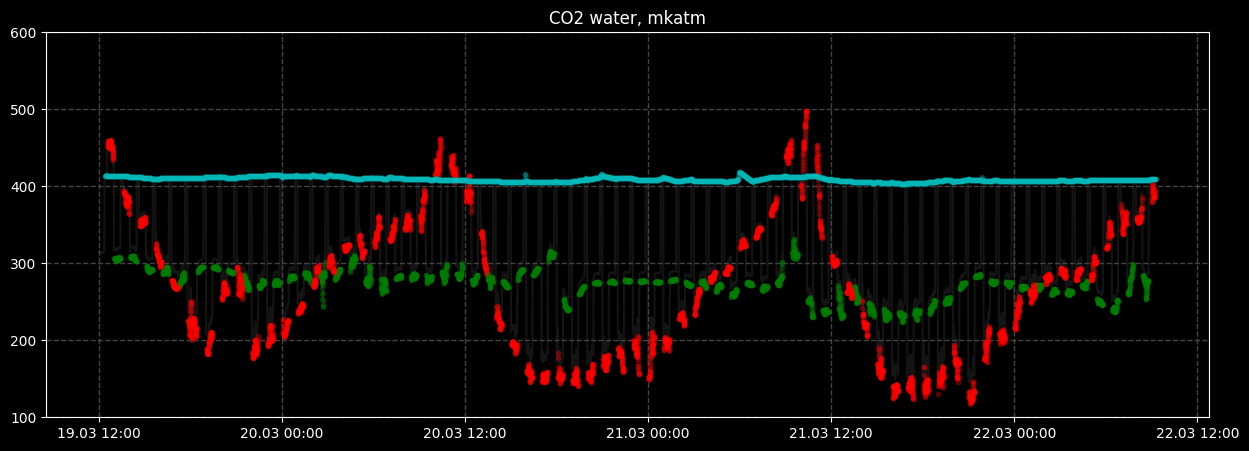

In [479]:
count_recent = 30000

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots()
## ax.set_xlim(pd.to_datetime('05.06.2023 18:00:00', dayfirst=True), pd.to_datetime('05.06.2023 19:00:00', dayfirst=True))
ax.set_title('CO2 water, mkatm')
ax.set_ylim(100, 600)
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCO2'], '-', c='#444', alpha=0.3)
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCO2sur'], 'g.', alpha=0.3)
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCO2bot'], 'r.', alpha=0.3)
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCO2air'], 'c.', alpha=0.1)

ax.grid(True, c='#555', alpha=0.8, linewidth=1, linestyle='--')
ax.xaxis.set_major_formatter(DateFormatter('%d.%m %H:%M'))

fig.savefig(serverPath+'pCO2wtr_vs_time.png', bbox_inches='tight')

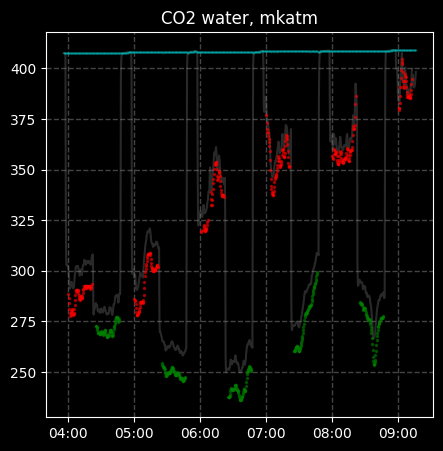

In [512]:
count_recent = 960

plt.rcParams['figure.figsize'] = [5, 5]
fig, ax = plt.subplots()
## ax.set_xlim(pd.to_datetime('05.06.2023 18:00:00', dayfirst=True), pd.to_datetime('05.06.2023 19:00:00', dayfirst=True))
ax.set_title('CO2 water, mkatm')
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCO2'], '-', c='#888', alpha=0.3)
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCO2sur'], 'g.', alpha=0.5, markersize=3)
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCO2bot'], 'r.', alpha=0.5, markersize=3)
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCO2air'], 'c.', alpha=0.3, markersize=1)

ax.grid(True, c='#555', alpha=0.8, linewidth=1, linestyle='--')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))

fig.savefig(serverPath+'pCO2wtr_vs_time_3h.png', bbox_inches='tight')

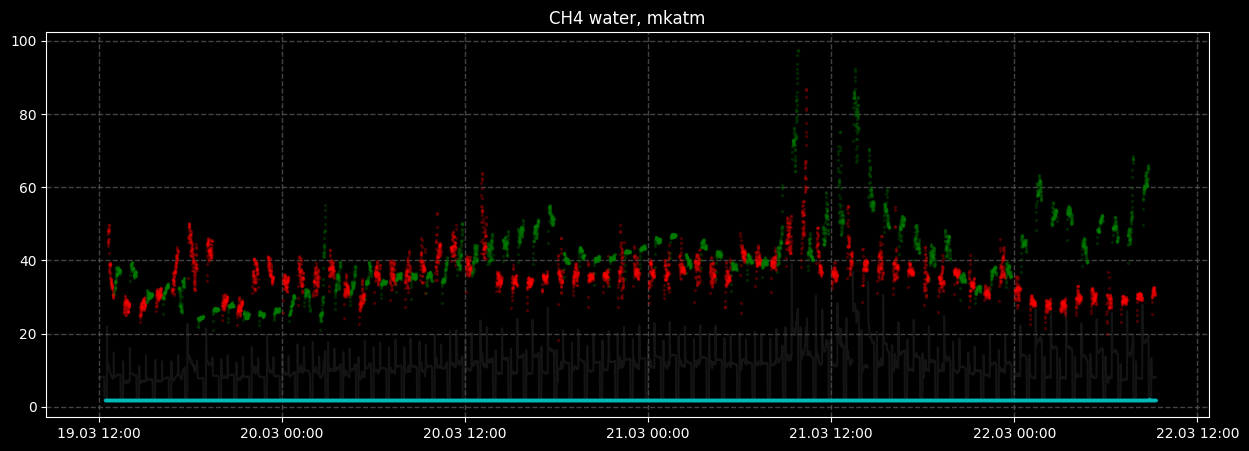

In [514]:
count_recent = 30000

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots()
ax.set_title('CH4 water, mkatm')
# ax.set_xlim(pd.to_datetime('06.06.2023 10:00:00', dayfirst=True), pd.to_datetime('06.06.2023 19:00:00', dayfirst=True))
# ax.set_ylim(0, 20)
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCH4'], '-', c='#444', alpha=0.3)
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCH4bot'], 'r.', alpha=0.2, markersize=3)
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCH4sur'], 'g.', alpha=0.2, markersize=3)
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCH4air'], 'c.', alpha=0.2, markersize=3)
ax.grid(True, c='#555', alpha=0.8, linewidth=1, linestyle='--')
ax.xaxis.set_major_formatter(DateFormatter('%d.%m %H:%M'))
fig.savefig(serverPath+'pCH4wtr_vs_time.png', bbox_inches='tight')

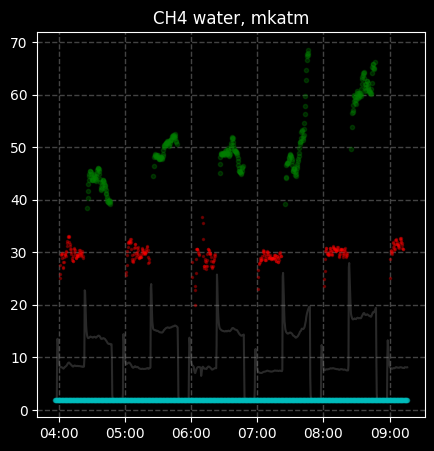

In [521]:
count_recent = 960

plt.rcParams['figure.figsize'] = [5, 5]
fig, ax = plt.subplots()
ax.set_title('CH4 water, mkatm')
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCH4'], '-', c='#888', alpha=0.3)
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCH4bot'], 'r.', alpha=0.3, markersize = 3)
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCH4sur'], 'g.', alpha=0.3)
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCH4air'], 'c.', alpha=0.3)
ax.grid(True, c='#555', alpha=0.8, linewidth=1, linestyle='--')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
fig.savefig(serverPath+'pCH4wtr_vs_time_3h.png', bbox_inches='tight')

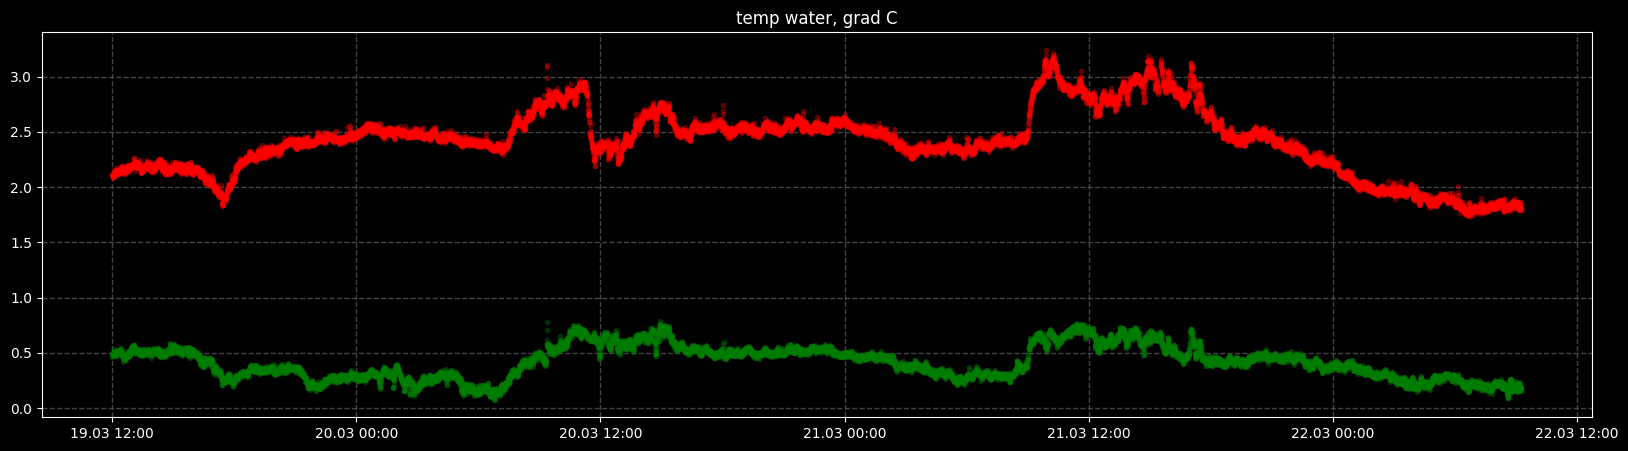

In [483]:
count_recent = 30000

plt.rcParams['figure.figsize'] = [20, 5]
fig, ax = plt.subplots()
ax.set_title('temp water, grad C')
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['TempEqu1'], 'r.', alpha=0.3)
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['TempEqu2'], 'g.', alpha=0.3)
ax.grid(True, c='#555', alpha=0.8, linewidth=1, linestyle='--')
ax.xaxis.set_major_formatter(DateFormatter('%d.%m %H:%M'))
fig.savefig(serverPath+'tempWtr_vs_time.png', bbox_inches='tight')

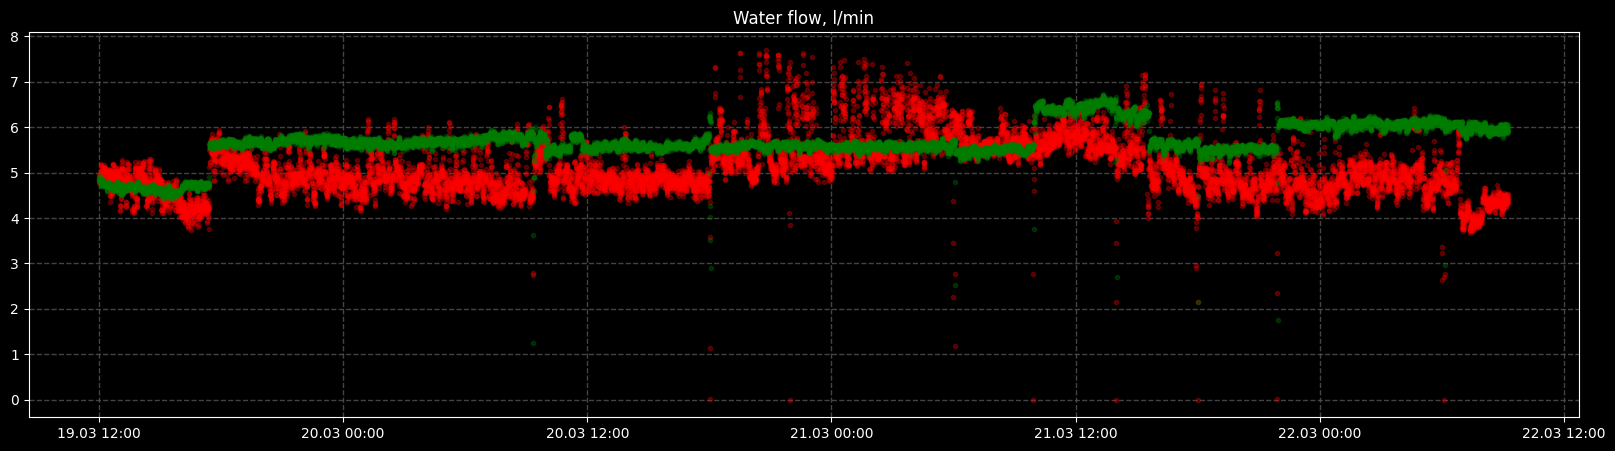

In [484]:
count_recent = 30000

plt.rcParams['figure.figsize'] = [20, 5]
fig, ax = plt.subplots()
ax.set_title('Water flow, l/min')
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['WaterFlowEqu1'], 'r.', alpha=0.3)
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['WaterFlowEqu2'], 'g.', alpha=0.3)
ax.grid(True, c='#555', alpha=0.8, linewidth=1, linestyle='--')
ax.xaxis.set_major_formatter(DateFormatter('%d.%m %H:%M'))
fig.savefig(serverPath+'waterFlow_vs_time.png', bbox_inches='tight')

In [485]:
df.columns

Index(['TempAir', 'PressAir', 'Precipitation', 'LightLX', 'LightUV',
       'V1_state', 'V2_state', 'V3_state', 'V4_state', 'V5_state', 'V6_state',
       'V7_state', 'V8_state', 'AirFlow', 'Latitude', 'Longitude', 'Speed',
       'Course', 'RELEY_1', 'RELEY_2', 'RELEY_3', 'RELEY_4', 'WaterFlowEqu1',
       'WaterFlowEqu2', 'WaterFlowEqu3', 'WaterFlowEqu4', 'TempEqu1',
       'TempEqu2', 'TempEqu3', 'METEO_LEVEL', 'METEO_PRESS', 'METEO_TIME',
       'METEO_TEMP', 'METEO_HUM', 'METEO_SOLAR', 'METEO_WIND_DIR',
       'METEO_WIND_SPEED', 'METEO_RAIN', 'vCO2', 'vCH4', 'vH2O', 'FluoNxBlu',
       'FluoKfaBlu', 'FluoNxGrn', 'FluoKfaGrn', 'FluoNxRed', 'FluoKfaRed',
       'Channel', 'reff', 'Chn_valid', 'DateTime', 'vCO2air', 'vCH4air',
       'pCO2air', 'pCH4air', 'pCO2', 'pCH4', 'DateSec', 'dTSec', 'cCO2bot',
       'pCO2bot', 'cCH4bot', 'pCH4bot', 'cCO2sur', 'pCO2sur', 'cCH4sur',
       'pCH4sur'],
      dtype='object')

In [486]:
df['hour'] = df['DateTime'].dt.hour + df['DateTime'].dt.minute / 60
df['hour']

DateTime
2024-03-19 12:00:00    12.000000
2024-03-19 12:00:20    12.000000
2024-03-19 12:00:40    12.000000
2024-03-19 12:01:00    12.016667
2024-03-19 12:01:20    12.016667
                         ...    
2024-03-22 09:14:40     9.233333
2024-03-22 09:15:00     9.250000
2024-03-22 09:15:20     9.250000
2024-03-22 09:15:40     9.250000
2024-03-22 09:16:00     9.266667
Name: hour, Length: 12457, dtype: float64

In [525]:
cols = ['hour', 'DateSec', 'TempAir', 'PressAir', 'Precipitation', 'LightLX', 'LightUV',
        'METEO_LEVEL', 'METEO_PRESS', 'METEO_TEMP', 'METEO_HUM', 'METEO_SOLAR', 'METEO_WIND_DIR', 'METEO_WIND_SPEED', 'METEO_RAIN',
        'vCO2', 'vCH4', 'vH2O', 'AirFlow', 'Channel',
        #'FluoNxRed', 'FluoNxGrn', 'FluoNxBlu', 'FluoKfaRed', 'FluoKfaGrn', 'FluoKfaBlu', 'WaterFlowEqu1',
        'WaterFlowEqu2', 'WaterFlowEqu3', 'WaterFlowEqu4',
        'TempEqu1', 'TempEqu2', 'TempEqu3',
        # 'cCO2chm', 'cCH4chm', 'CO2flux', 'CH4flux',
        'vCO2air', 'vCH4air',
        'pCO2air', 'pCH4air', 'cCO2sur', 'pCO2sur',
        'cCH4sur', 'pCH4sur', 'cCO2bot', 'pCO2bot', 'cCH4bot', 'pCH4bot',]
df.to_csv(f'{saveDataPath}origin.txt',
          columns=cols,
          sep='\t',
         )

In [488]:
hourly = df.resample('1H', on='DateTime').mean()
hourly.to_csv(f'{saveDataPath}hourly.txt',
              columns=cols,
              sep='\t',
             )

In [ ]:
sol_ch4 = bfunc.getSolubility(df['TempEqu1'], 'ch4')
sol_ch4

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['TempEqu1'], sol_ch4, 'ro')

In [ ]:
temp = [t for t in range(0, 50)]
dft = pd.DataFrame(temp, columns=['temperature'])
dft['sol'] = bfunc.getSolubility(dft['temperature'], 'ch4')

fig, ax = plt.subplots(1)

ax.plot(dft['temperature'], dft['sol'])